In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
train =pd.read_csv("../input/nasa-nearest-earth-objects/neo_v2.csv")
train

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [3]:
train.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
train.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


**Removing unnecessary data**

In [6]:
train=train.drop(['id','orbiting_body','sentry_object','name'],axis=1)
train

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['hazardous']=le.fit_transform(train['hazardous'])
train

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,0
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,0
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,0
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,0


In [8]:
X=train.drop(['hazardous'],axis=1)
y=train['hazardous']

In [9]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09
...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80


In [10]:
y

0        0
1        1
2        0
3        0
4        1
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 90836, dtype: int64

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:

X_train

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
25827,0.402305,0.899580,14979.289340,5.618638e+07,19.10
13109,0.856160,1.914432,59167.008197,5.917761e+07,17.46
69188,0.152249,0.340440,48110.586552,6.333916e+07,21.21
45884,0.055533,0.124177,18352.877547,5.365066e+07,23.40
65029,0.048368,0.108153,34595.258672,7.039937e+07,23.70
...,...,...,...,...,...
45869,0.012722,0.028447,35773.111750,3.863983e+06,26.60
21774,0.010582,0.023661,60554.496240,2.530966e+07,27.00
27308,0.022108,0.049436,43718.843537,5.379304e+07,25.40
12278,0.552783,1.236061,114794.759537,6.140259e+07,18.41


****

**PLOTS**

<AxesSubplot:>

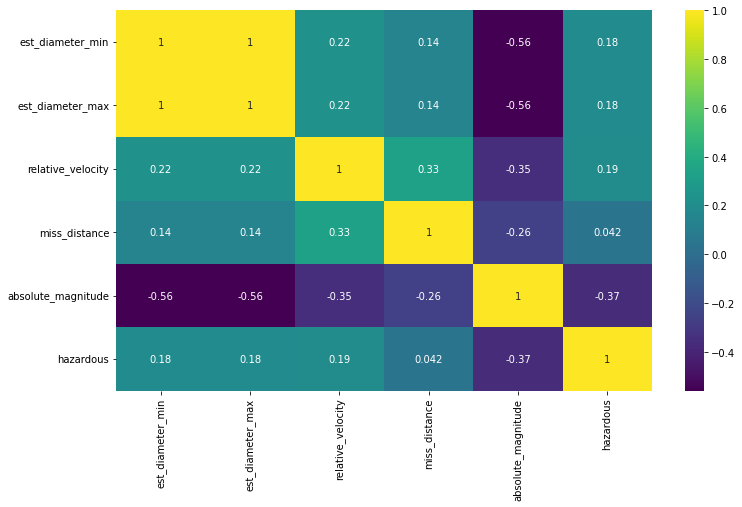

In [13]:
plt.figure(figsize=(12,7))

sns.heatmap(train.corr(),annot=True,cmap='viridis')
# A heatmap with the correlation between the variables

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hazardous', ylabel='count'>

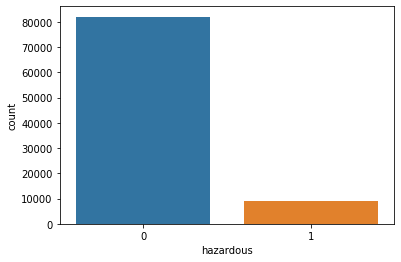

In [14]:
sns.countplot(train['hazardous'])

<AxesSubplot:>

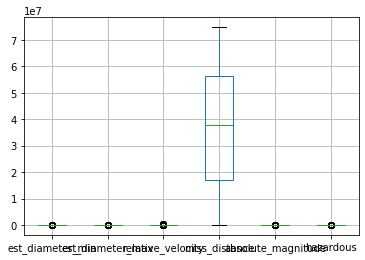

In [15]:
plot=['est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude', 'hazardous']
train.boxplot(plot)

****

**IMPLEMENTATION OF KERNELS**

In [16]:
clf=SVC(kernel="rbf")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_1=accuracy_score(y_test,y_pred)
precision_1=precision_score(y_test,y_pred, average="weighted")
f1score_1=f1_score(y_test,y_pred, average="weighted")
print("Accuracy",accuracy_1)
print("Precision",precision_1)
print("f1:",f1score_1)

Accuracy 0.9056181424534879
Precision 0.820144219940906
f1: 0.860764495960317


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
clf=SVC(kernel="poly")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_2=accuracy_score(y_test,y_pred)
precision_2=precision_score(y_test,y_pred, average="weighted")
f1score_2=f1_score(y_test,y_pred, average="weighted")
print("Accuracy",accuracy_2)
print("Precision",precision_2)
print("f1:",f1score_2)

Accuracy 0.9056181424534879
Precision 0.820144219940906
f1: 0.860764495960317


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
clf=SVC(kernel="sigmoid")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_3=accuracy_score(y_test,y_pred)
precision_3=precision_score(y_test,y_pred, average="weighted")
f1score_3=f1_score(y_test,y_pred, average="weighted")
print("Accuracy",accuracy_3)
print("Precision",precision_3)
print("f1:",f1score_3)

Accuracy 0.8255476863234377
Precision 0.8280034034845142
f1: 0.8267711797804734


In [19]:
accuracy_scores=[accuracy_1,accuracy_2,accuracy_3]
precision_scores=[precision_1,precision_2,precision_3]
f1scores=[f1score_1,f1score_2,f1score_3]
kernels=['Rbf','polynomial','Sigmoid']

<AxesSubplot:>

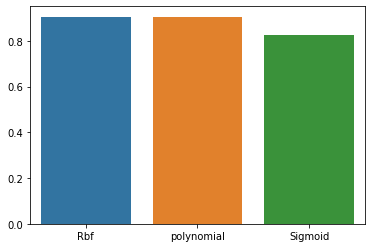

In [20]:
sns.barplot(x=kernels, y=accuracy_scores)

<AxesSubplot:>

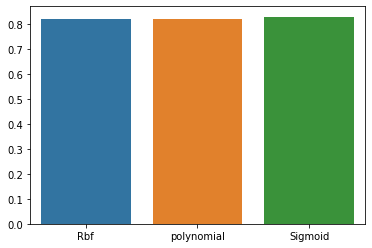

In [21]:
sns.barplot(x=kernels, y=precision_scores)

<AxesSubplot:>

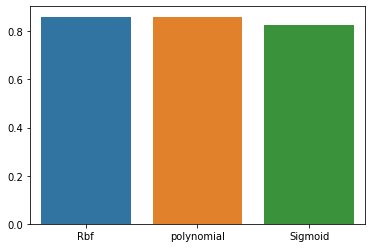

In [22]:
sns.barplot(x=kernels, y=f1scores)

([<matplotlib.patches.Wedge at 0x7f8f14585410>,
 [Text(0.5366393746720414, 0.9602177781897191, ''),
  Text(-1.099034213374582, -0.04608468110027379, ''),
  Text(0.5763966060120093, -0.9368921776692539, '')])

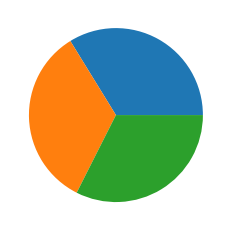

In [23]:
plt.pie(f1scores)

([<matplotlib.patches.Wedge at 0x7f8f145e7b10>,
 [Text(0.5531732827084851, 0.9507887879532019, ''),
  Text(-1.0999449686040579, 0.011003001527680856, ''),
  Text(0.543635215528363, -0.9562744127275551, '')])

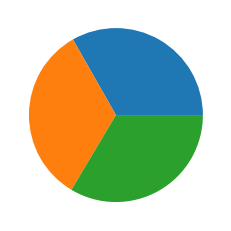

In [24]:
plt.pie(precision_scores)

****